In [1]:
import numpy as np

1-D Interpolation Piece- wise interpolation

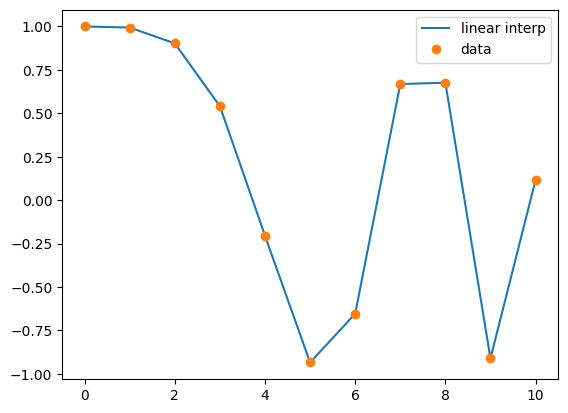

In [3]:
x = np.linspace(0,10,11)
y  =np.cos(-x**2/9.0)


xnew = np.linspace(0,10,1001)
ynew = np.interp(xnew,x,y)

import matplotlib.pyplot as plt
plt.plot(xnew, ynew, '-', label='linear interp')
plt.plot(x, y, 'o', label='data')
plt.legend(loc='best')
plt.show()

Cubic Splines for smooth curve

In [5]:
from scipy.interpolate import CubicSpline
spl = CubicSpline([1, 2, 3, 4, 5, 6], [1, 4, 8, 16, 25, 36])
spl(2.5)

array(5.57083333)

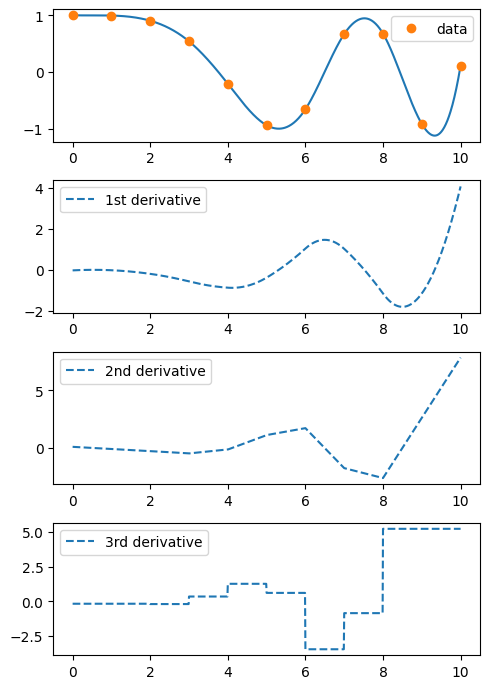

In [7]:
x = np.linspace(0,10,11)
y = np.cos(-x**2/9.0)

spl = CubicSpline(x,y)

xnew = np.linspace(0,10,1001)

import matplotlib.pyplot as plt
fig,ax = plt.subplots(4,1,figsize=(5,7))
ax[0].plot(xnew ,spl(xnew))
ax[0].plot(x,y,'o',label='data')
ax[1].plot(xnew,spl(xnew, nu=1),'--',label='1st derivative')
ax[2].plot(xnew,spl(xnew, nu=2),'--',label='2nd derivative')
ax[3].plot(xnew,spl(xnew, nu=3),'--',label='3rd derivative')

for j in range(4):
    ax[j].legend(loc='best')
plt.tight_layout()
plt.show()

Monotone interpolant


Cubic splines are by construction twice continuously differentiable. This may lead to the spline function oscillating and ‘’overshooting’’ in between the data points. In these situations, an alternative is to use the so-called monotone cubic interpolants: these are constructed to be only once continuously differentiable, and attempt to preserve the local shape implied by the data.

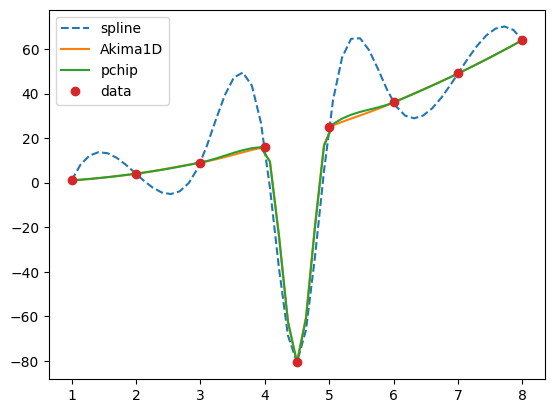

In [15]:
import numpy as np
from scipy.interpolate import CubicSpline, PchipInterpolator, Akima1DInterpolator

x = np.array([1., 2., 3., 4., 4.5, 5., 6., 7., 8])
y = x**2
y[4] -=101


import matplotlib.pyplot as plt 

xx = np.linspace(1,8,51)
plt.plot(xx, CubicSpline(x, y)(xx), '--', label='spline')
plt.plot(xx, Akima1DInterpolator(x, y)(xx), '-', label='Akima1D')
plt.plot(xx, PchipInterpolator(x, y)(xx), '-', label='pchip')
plt.plot(x, y, 'o' , label='data')
plt.legend(loc='best')
plt.show()

Interpolation with B-splines

<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ACER\AppData\Local\Temp\ipykernel_6024\625534384.py:13: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(xx, der(xx)/np.pi, '--', label='$d \sin(\pi x)/dx / \pi$ approx')


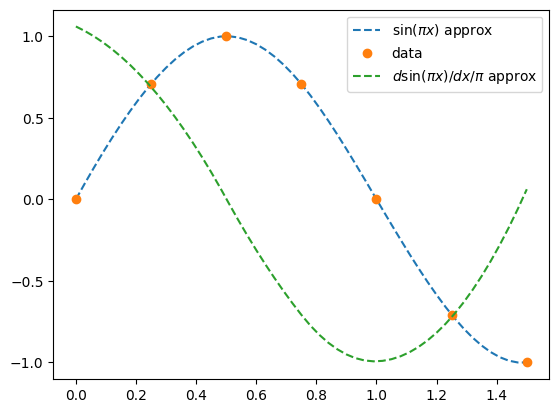

In [3]:
x = np.linspace(0, 3/2, 7)
y = np.sin(np.pi*x)

from scipy.interpolate import make_interp_spline
bspl = make_interp_spline(x,y,k=3)   #b-spline degree, 3 means cubic (3 is default anyway)

der = bspl.derivative()

import matplotlib.pyplot as plt
xx = np.linspace(0,3/2,51)
plt.plot(xx, bspl(xx), '--', label=r'$\sin(\pi x)$ approx')
plt.plot(x, y, 'o', label='data')
plt.plot(xx, der(xx)/np.pi, '--', label='$d \sin(\pi x)/dx / \pi$ approx')
plt.legend()
plt.show()

Parametric spline curves


So far we considered spline functions, where the data, y, is expected to depend explicitly on the independent variable x—so that the interpolating function satisfies 
. Spline curves treat the x and y arrays as coordinates of points, 
 on a plane, and an interpolating curve which passes through these points is parameterized by some additional parameter (typically called u).

In [4]:
x = [0, 1, 2, 3, 4, 5, 6]
y = [0, 0, 0, 9, 0, 0, 0]
p = np.stack((x, y))
p

array([[0, 1, 2, 3, 4, 5, 6],
       [0, 0, 0, 9, 0, 0, 0]])

In [6]:
#uniform parametrization
u_unif = x

u_unif

[0, 1, 2, 3, 4, 5, 6]

In [10]:
#cord length parametrization, which is nothing but a cumulative length of straight line segments connecting the data points

In [8]:
p[:,1:]

array([[1, 2, 3, 4, 5, 6],
       [0, 0, 9, 0, 0, 0]])

In [9]:
p[:,:-1]

array([[0, 1, 2, 3, 4, 5],
       [0, 0, 0, 9, 0, 0]])

In [11]:
dp = p[:,1:] - p[:,:-1]
l = (dp**2).sum(axis=0)
u_cord = np.sqrt(l).cumsum()
u_cord = np.r_[0,u_cord]  #the first point is parameterized at zero



![alt text](<figures/centripetal parametrization.png>)

In [13]:
u_c = np.r_[0,np.cumsum((dp**2).sum(axis=0)**0.25)]

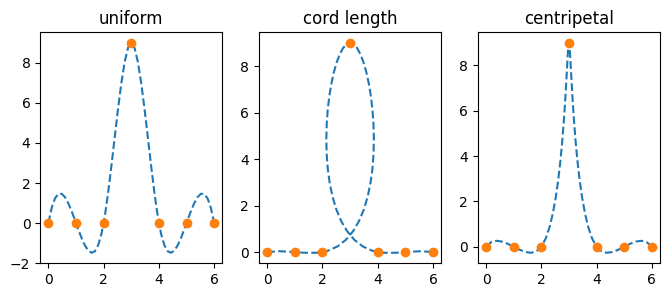

In [14]:
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(8, 3))
parametrizations = ['uniform', 'cord length', 'centripetal']


for j,u in enumerate([u_unif,u_cord,u_c]):
    spl = make_interp_spline(u,p,axis=1)
    
    uu = np.linspace(u[0], u[-1], 51)
    xx ,yy = spl(uu)
    
    ax[j].plot(xx, yy, '--')
    ax[j].plot(p[0, :], p[1, :], 'o')
    ax[j].set_title(parametrizations[j])
plt.show()